In [1]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 34.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import os
import sys
import pyarrow.parquet as pq
import re
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pytz
import math
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [8]:
def compute_portfolio_metrics(monthly_returns):
    """

    Args:
    - returns (array-like): Array or list of portfolio returns

    Returns:
    - sharpe_ratio (float): Sharpe ratio of the portfolio
    - max_drawdown (float): Maximum drawdown of the portfolio
    - hit_rate (float): Hit rate of the portfolio (percentage of positive returns)
    """
    monthly_returns = monthly_returns/100
    # Calculate Sharpe Ratio
    annualized_returns = monthly_returns.mean() * 12
    annualized_volatility = monthly_returns.std() * np.sqrt(12)
    sharpe_ratio = annualized_returns / annualized_volatility

    # Maximum Drawdown
    cumulative_returns = (1 + monthly_returns).cumprod()
    peak_value = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak_value) / peak_value
    max_drawdown = drawdown.min()

    # Hit Rate
    positive_returns = monthly_returns[monthly_returns > 0]
    hit_rate = len(positive_returns) / len(monthly_returns)

    # Compound Annual Growth Rate (CAGR)
    total_return = cumulative_returns.iloc[-1] - 1
    num_years = len(monthly_returns) / 12
    cagr = ((1 + total_return) ** (1 / num_years) - 1)*100
    monthly_ret = int(monthly_returns.mean()*10000)
    monthly_vol = int(monthly_returns.std()*10000)

    metrics_dict = {
        'Sharpe Ratio': sharpe_ratio.round(2),
        'Max Drawdown': max_drawdown.round(2),
        'Hit Rate': str(int(hit_rate*100))+'%',
        'CAGR': str(cagr.round(2))+'%',
        'Monthly Returns': str(monthly_ret)+'bps' ,
        'Monthly Vol': str(monthly_vol)+'bps'
    }
    metrics_dict = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])
    return metrics_dict

def plot_returns(monthly_returns, dates):
    """
    Plot monthly returns and cumulative returns.

    Parameters:
    - monthly_returns: Pandas Series or DataFrame with monthly portfolio returns.

    Returns:
    - None
    """
    monthly_returns = monthly_returns/100
    # Calculate cumulative returns
    cumulative_returns = (1 + monthly_returns).cumprod() - 1

    # Plot monthly returns
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(dates, monthly_returns, color='blue', label='Monthly Returns')
    plt.ylabel('Returns')
    plt.title('Monthly Returns')
    plt.yticks(color= 'red')

    # Plot cumulative returns
    plt.subplot(2, 1, 2)
    plt.plot(dates, cumulative_returns, color='green', label='Cumulative Returns')
    plt.ylabel('Cumulative Returns (%)', fontsize=16)
    plt.title('Performance of sentiment based LS strategy', fontsize=16)
    plt.xticks(fontsize=16)  # Adjust the font size as needed
    plt.yticks(fontsize=16) 

    
    plt.show()

In [4]:
cos_sim = pq.read_table('/data/workspace_files/parquet_files/portfolio_returns/1996_2014/sentiment_score_LS_ew.parquet').to_pandas()
#start_date = pd.Timestamp('1997-01-01')
#cos_sim = cos_sim[cos_sim['date']>=start_date]

## Sentiment Score

,Value
Sharpe Ratio,0.68
Max Drawdown,-0.26
Hit Rate,54%
CAGR,2.76%
Monthly Returns,23bps
Monthly Vol,119bps


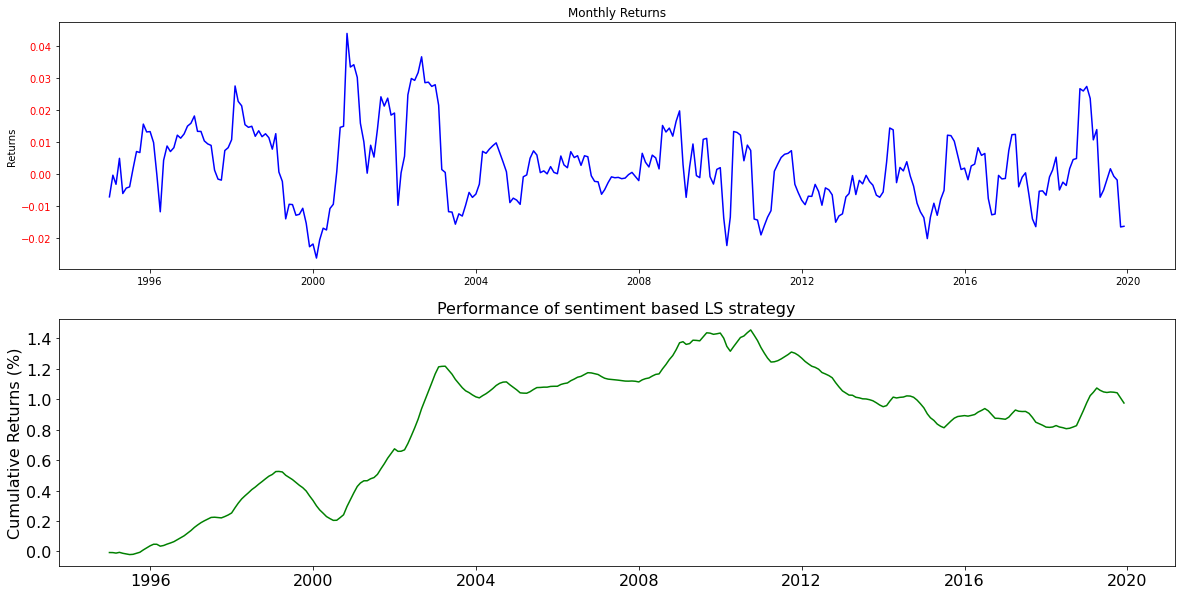

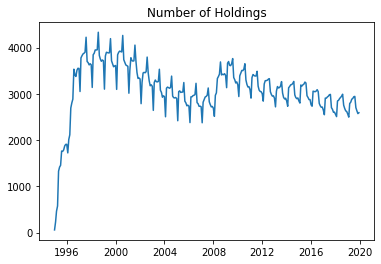

In [9]:
display(compute_portfolio_metrics(cos_sim['return_clipped2']))
plot_returns(cos_sim['return_clipped2'], cos_sim['date'])
plt.plot(cos_sim['date'], cos_sim['num_holdings'])
plt.title('Number of Holdings')
plt.show()